# Bike Sales Data Analysis

This notebook presents an exploratory data analysis (EDA) of a bike sales dataset. The analysis covers data cleaning, univariate, bivariate, and multivariate exploration to uncover insights about sales trends, customer demographics, and product performance. Key steps include handling missing values, detecting and treating outliers, and visualizing relationships between variables. The goal is to better understand the factors influencing bike sales and provide actionable business insights.

## Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a data analysis process aimed at understanding the characteristics, structure, and key components of a dataset before applying more complex statistical models or algorithms. EDA involves identifying patterns, anomalies, testing hypotheses, and assumptions. This process helps to build a general overview of the data before conducting deeper analysis.

Several common techniques used in EDA include:

1. **Bivariate Analysis**: Examines the relationship and correlation between two variables, often using scatter plots and bar charts.
2. **Univariate Analysis**: Focuses on a single variable to describe and summarize it, typically with histograms or box plots.
3. **Multivariate Analysis**: Analyzes more than two variables simultaneously to uncover patterns and correlations, using techniques such as Principal Component Analysis (PCA).
4. **Time Series Analysis**: Studies data collected over time to identify trends and seasonal patterns, often using timeline plots and ARIMA models.
5. **Outlier Analysis**: Detects data points that are significantly different from others, usually with box plots and Z-scores.
6. **Missing Data Analysis**: Handles missing or unavailable data through techniques such as data imputation, row deletion, or statistical modeling.
7. **Data Visualization**: Uses graphs or diagrams to visualize and better understand the data, and to identify patterns or anomalies not visible in numerical analysis. Common techniques include bar graphs, pie charts, heatmaps, and interactive dashboards.

### Library Import and Data Loading

In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df=pd.read_csv("BikeSales.csv")
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [47]:
# Drop attributes that are not needed for analysis
df.drop('Date', axis=1, inplace=True)
df.drop('Product', axis=1, inplace=True)
df.drop('Customer_Age', axis=1, inplace=True)
df.drop('Customer_Gender', axis=1, inplace=True)
df.drop('State', axis=1, inplace=True)
df

,Day,Month,Year,Age_Group,Country,Product_Category,Sub_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26,November,2013,Youth (<25),Canada,Accessories,Bike Racks,8,45,120,590,360,950
1,26,November,2015,Youth (<25),Canada,Accessories,Bike Racks,8,45,120,590,360,950
2,23,March,2014,Adults (35-64),Australia,Accessories,Bike Racks,23,45,120,1366,1035,2401
3,23,March,2016,Adults (35-64),Australia,Accessories,Bike Racks,20,45,120,1188,900,2088
4,15,May,2014,Adults (35-64),Australia,Accessories,Bike Racks,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,12,April,2016,Adults (35-64),United Kingdom,Clothing,Vests,3,24,64,112,72,184
113032,2,April,2014,Youth (<25),Australia,Clothing,Vests,22,24,64,655,528,1183
113033,2,April,2016,Youth (<25),Australia,Clothing,Vests,22,24,64,655,528,1183
113034,4,March,2014,Adults (35-64),France,Clothing,Vests,24,24,64,684,576,1260


In [48]:
# Check if there are any null values
df.isnull().sum()

Day                 0
Month               0
Year                0
Age_Group           0
Country             0
Product_Category    0
Sub_Category        0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [49]:
# View statistical data (such as min, max, mean, etc.)
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Day,113036.0,NaN,NaN,NaN,15.665753,8.781567,1.0,8.0,16.0,23.0,31.0
Month,113036,12,June,11234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,113036.0,NaN,NaN,NaN,2014.401739,1.27251,2011.0,2013.0,2014.0,2016.0,2016.0
Age_Group,113036,4,Adults (35-64),55824,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,113036,6,United States,39206,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Category,113036,3,Accessories,70120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub_Category,113036,17,Tires and Tubes,33870,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order_Quantity,113036.0,NaN,NaN,NaN,11.90166,9.561857,1.0,2.0,10.0,20.0,32.0
Unit_Cost,113036.0,NaN,NaN,NaN,267.296366,549.835483,1.0,2.0,9.0,42.0,2171.0
Unit_Price,113036.0,NaN,NaN,NaN,452.938427,922.071219,2.0,5.0,24.0,70.0,3578.0


In [50]:
# Separate columns into numerical and categorical
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Month', 'Age_Group', 'Country', 'Product_Category', 'Sub_Category'], dtype='object')
Numerical Variables:
['Day', 'Year', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']


### Outlier Detection and Treatment

Outliers in numerical columns are detected using the Interquartile Range (IQR) method. The lower and upper bounds are calculated as follows:

- **Lower Bound** = Q1 - 1.5 * IQR
- **Upper Bound** = Q3 + 1.5 * IQR

Rows with values outside these bounds are identified as outliers. The number of outliers per column is also displayed. To treat outliers, values are clipped to the calculated lower and upper bounds, effectively reducing the influence of extreme values. After treatment, the number of remaining outliers is checked to ensure effective handling.

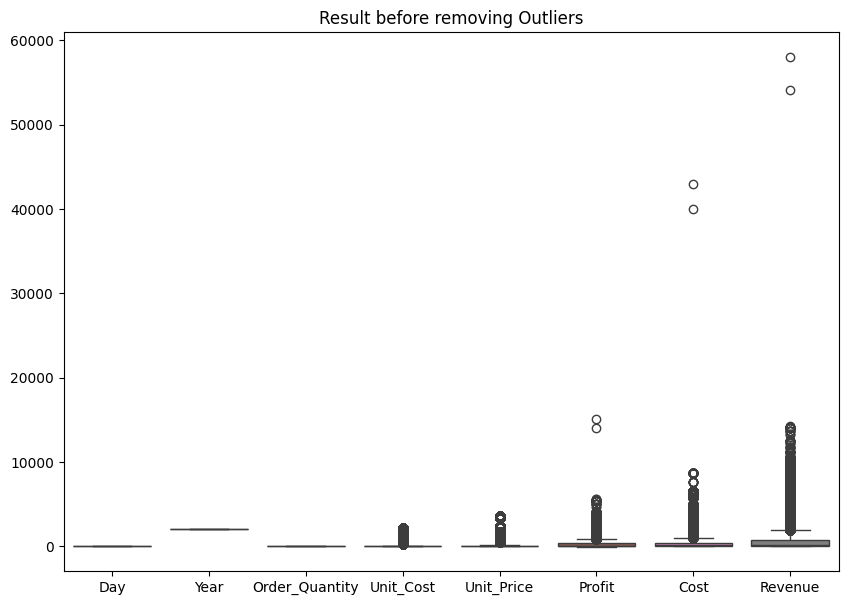

In [51]:
plt.subplots(figsize=(10,7))
sns.boxplot(data=df).set_title("Result before removing Outliers")
plt.show()

In [52]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Mendeteksi outlier
outliers = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).any(axis=1)

# Menampilkan baris data yang mengandung outlier
outlier_rows = df[outliers]
print("Rows containing outliers:")
print(outlier_rows)

# Jumlah outlier per kolom
outlier_counts = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)).sum()
print(f"Number of outliers per column:\n{outlier_counts}")

Rows containing outliers:
        Day     Month  Year             Age_Group        Country  \
2        23     March  2014        Adults (35-64)      Australia   
3        23     March  2016        Adults (35-64)      Australia   
8        22  February  2014        Adults (35-64)      Australia   
9        22  February  2016        Adults (35-64)      Australia   
30       13     March  2014        Adults (35-64)         Canada   
...     ...       ...   ...                   ...            ...   
113011   10     April  2016  Young Adults (25-34)        Germany   
113020    2   October  2013  Young Adults (25-34)  United States   
113021    2   October  2015  Young Adults (25-34)  United States   
113022   20     March  2014  Young Adults (25-34)  United States   
113023   20     March  2016  Young Adults (25-34)  United States   

       Product_Category Sub_Category  Order_Quantity  Unit_Cost  Unit_Price  \
2           Accessories   Bike Racks              23         45         120   

In [53]:
# Perform outlier data cleaning
df_no_outliers = df.copy()
for col in num_cols:
    df_no_outliers[col] = df[col].clip(lower=lower_bound[col], upper=upper_bound[col])

outliers_after = ((df_no_outliers[num_cols] < (Q1 - 1.5 * IQR)) | (df_no_outliers[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
print(f"Number of outliers after treatment: {outliers_after.sum()}")

df = df_no_outliers

Number of outliers after treatment: 0


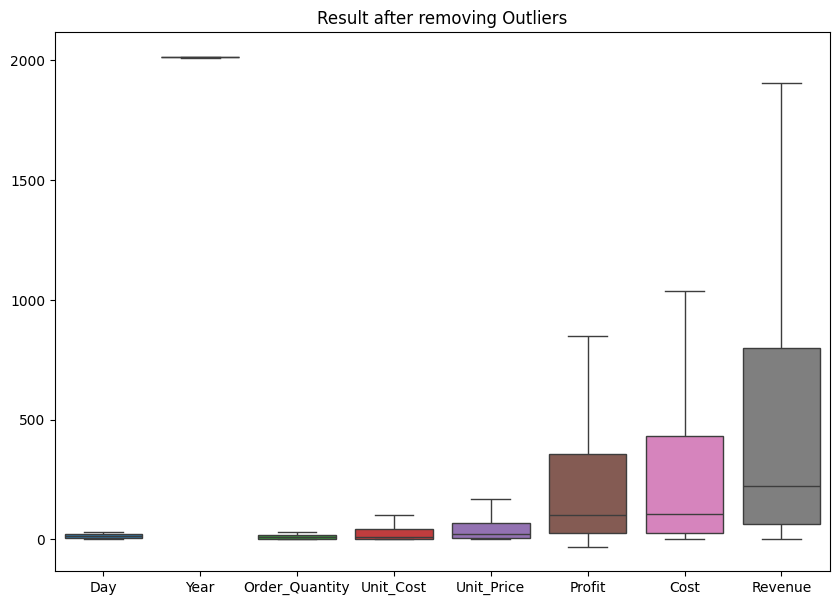

In [54]:
plt.subplots(figsize=(10,7))
sns.boxplot(data=df).set_title("Result after removing Outliers")
plt.show()

### 1. Univariate Analysis

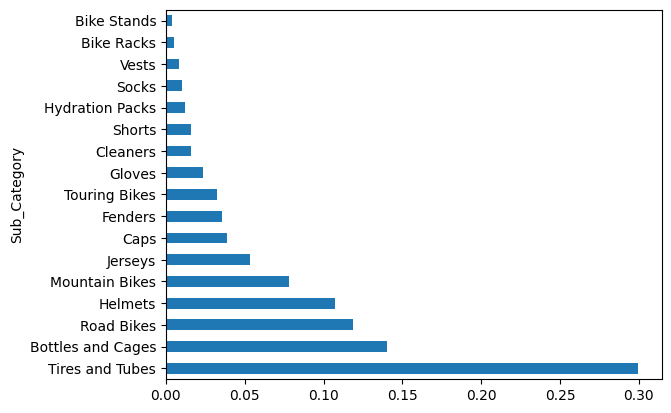

In [55]:
# Calculate the percentage of each product sub-category
df.Sub_Category.value_counts(normalize=True)

# Create a plot
df.Sub_Category.value_counts(normalize=True).plot.barh()
plt.show()

Based on the visualization above, it can be concluded that "Tires and Tubes" have the highest sales, while "Bike Stands" have the lowest sales.

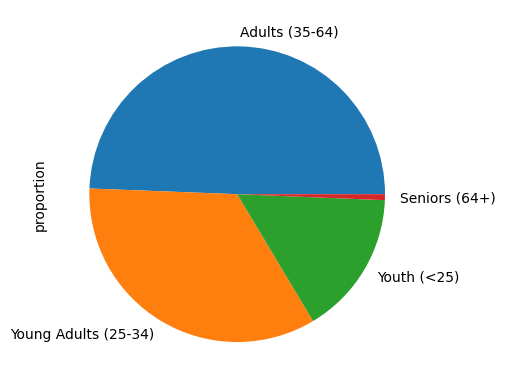

In [56]:
# Calculate the percentage of buyers by age group
df.Age_Group.value_counts(normalize=True)

# Create a pie plot
df.Age_Group.value_counts(normalize=True).plot.pie()
plt.show()

Based on the visualization above, it can be said that the majority of buyers are adults, while seniors rarely make purchases.

Day
Skew : 0.01


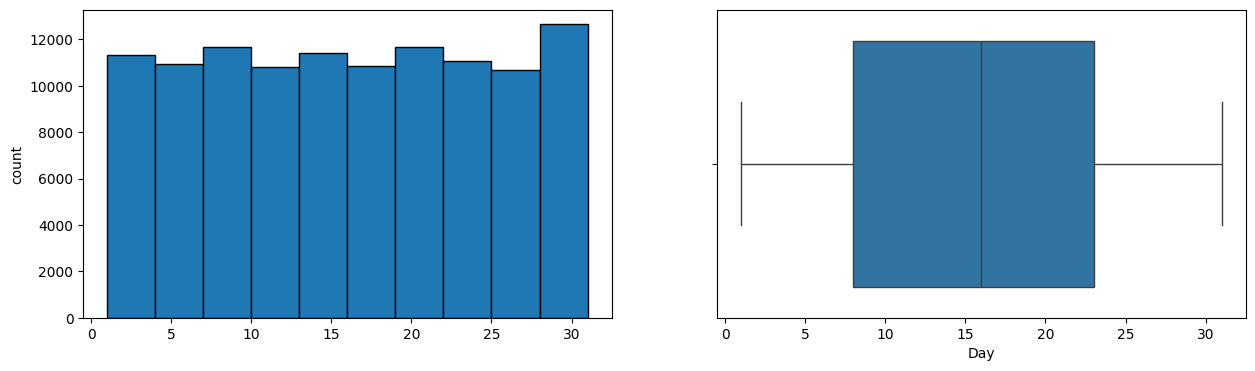

Year
Skew : -0.37


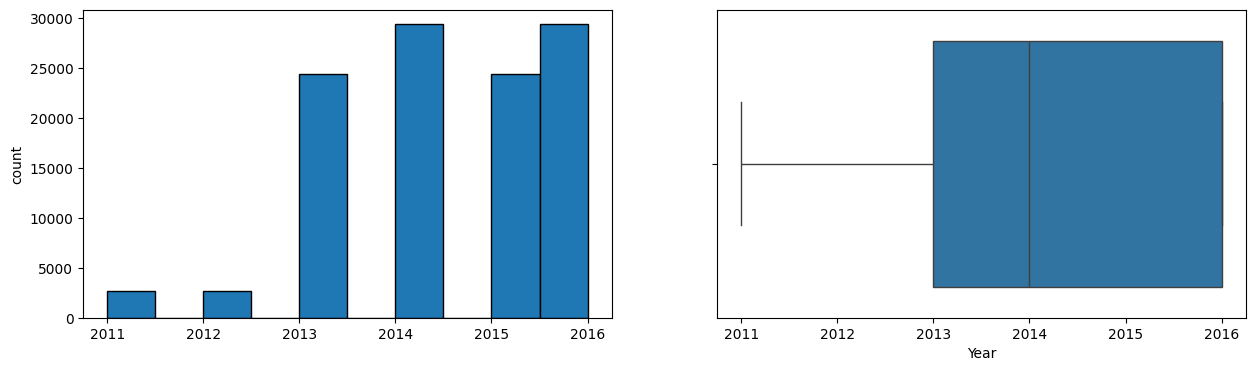

Order_Quantity
Skew : 0.38


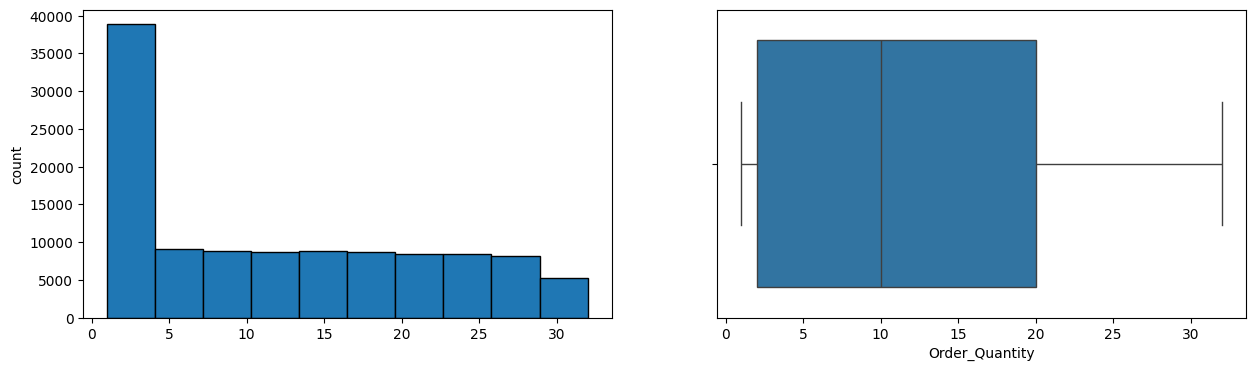

Unit_Cost
Skew : 1.11


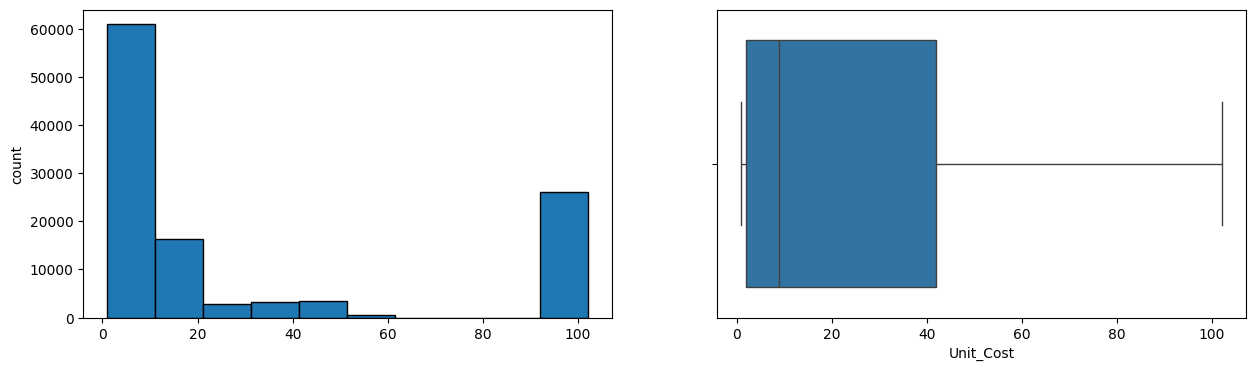

Unit_Price
Skew : 1.04


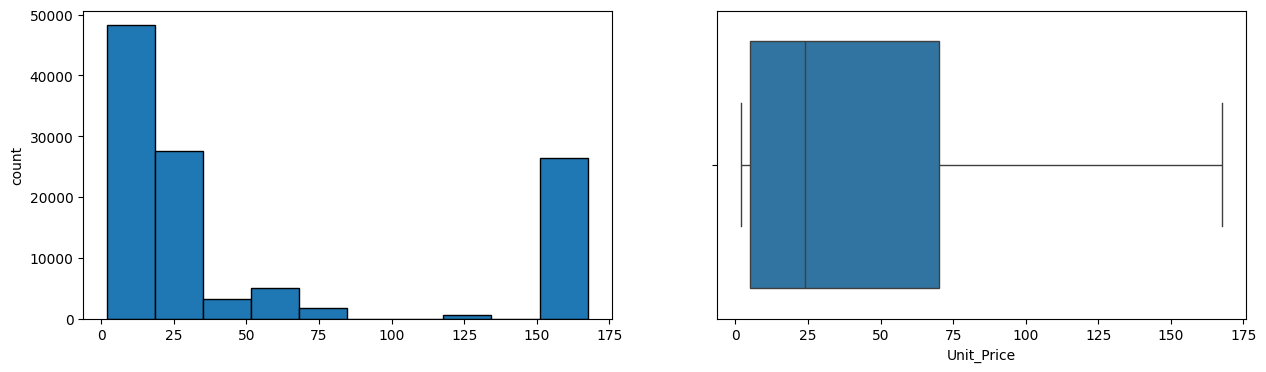

Profit
Skew : 1.22


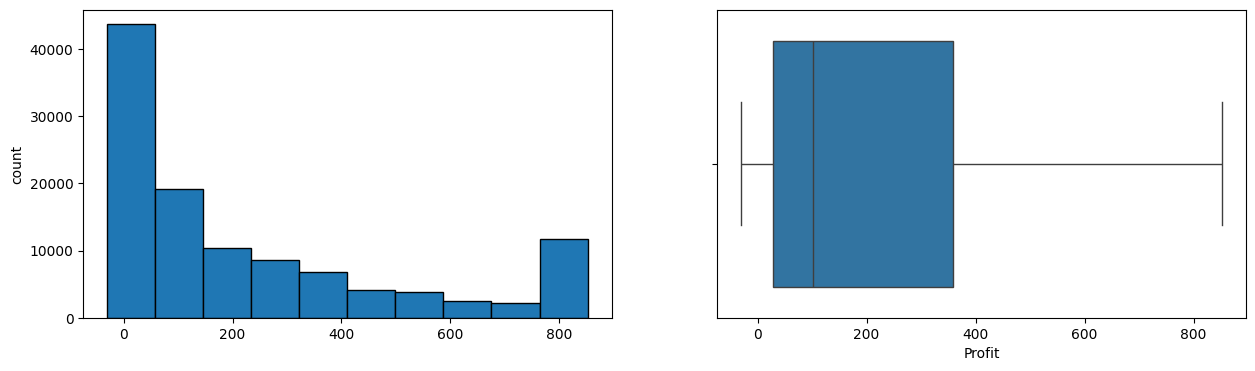

Cost
Skew : 1.14


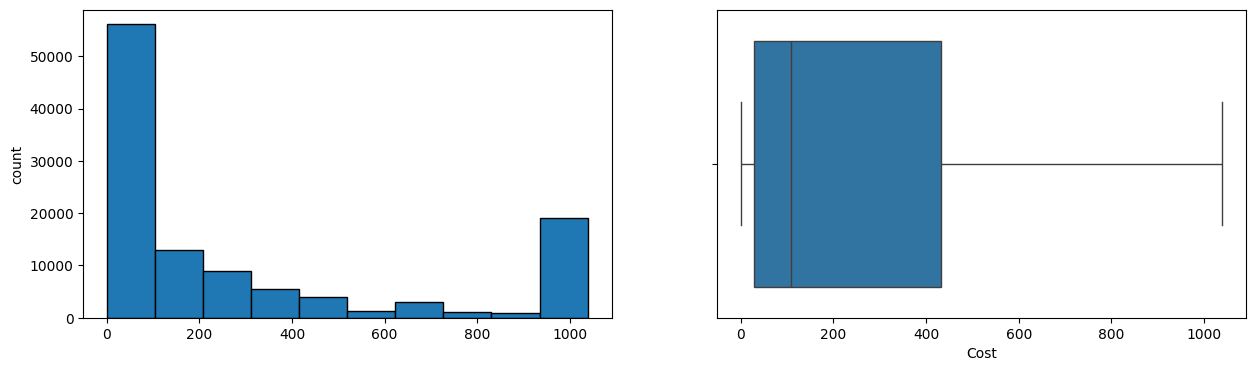

Revenue
Skew : 1.17


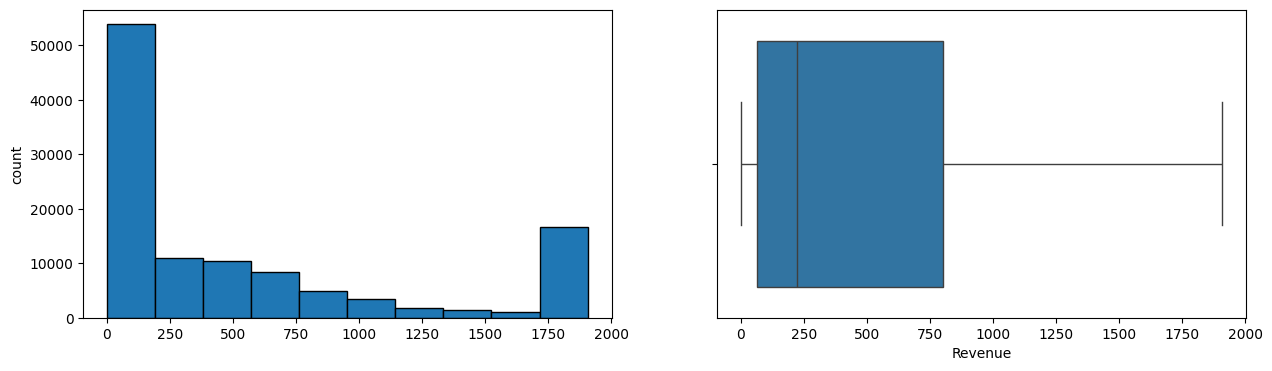

In [57]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False, edgecolor='black')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

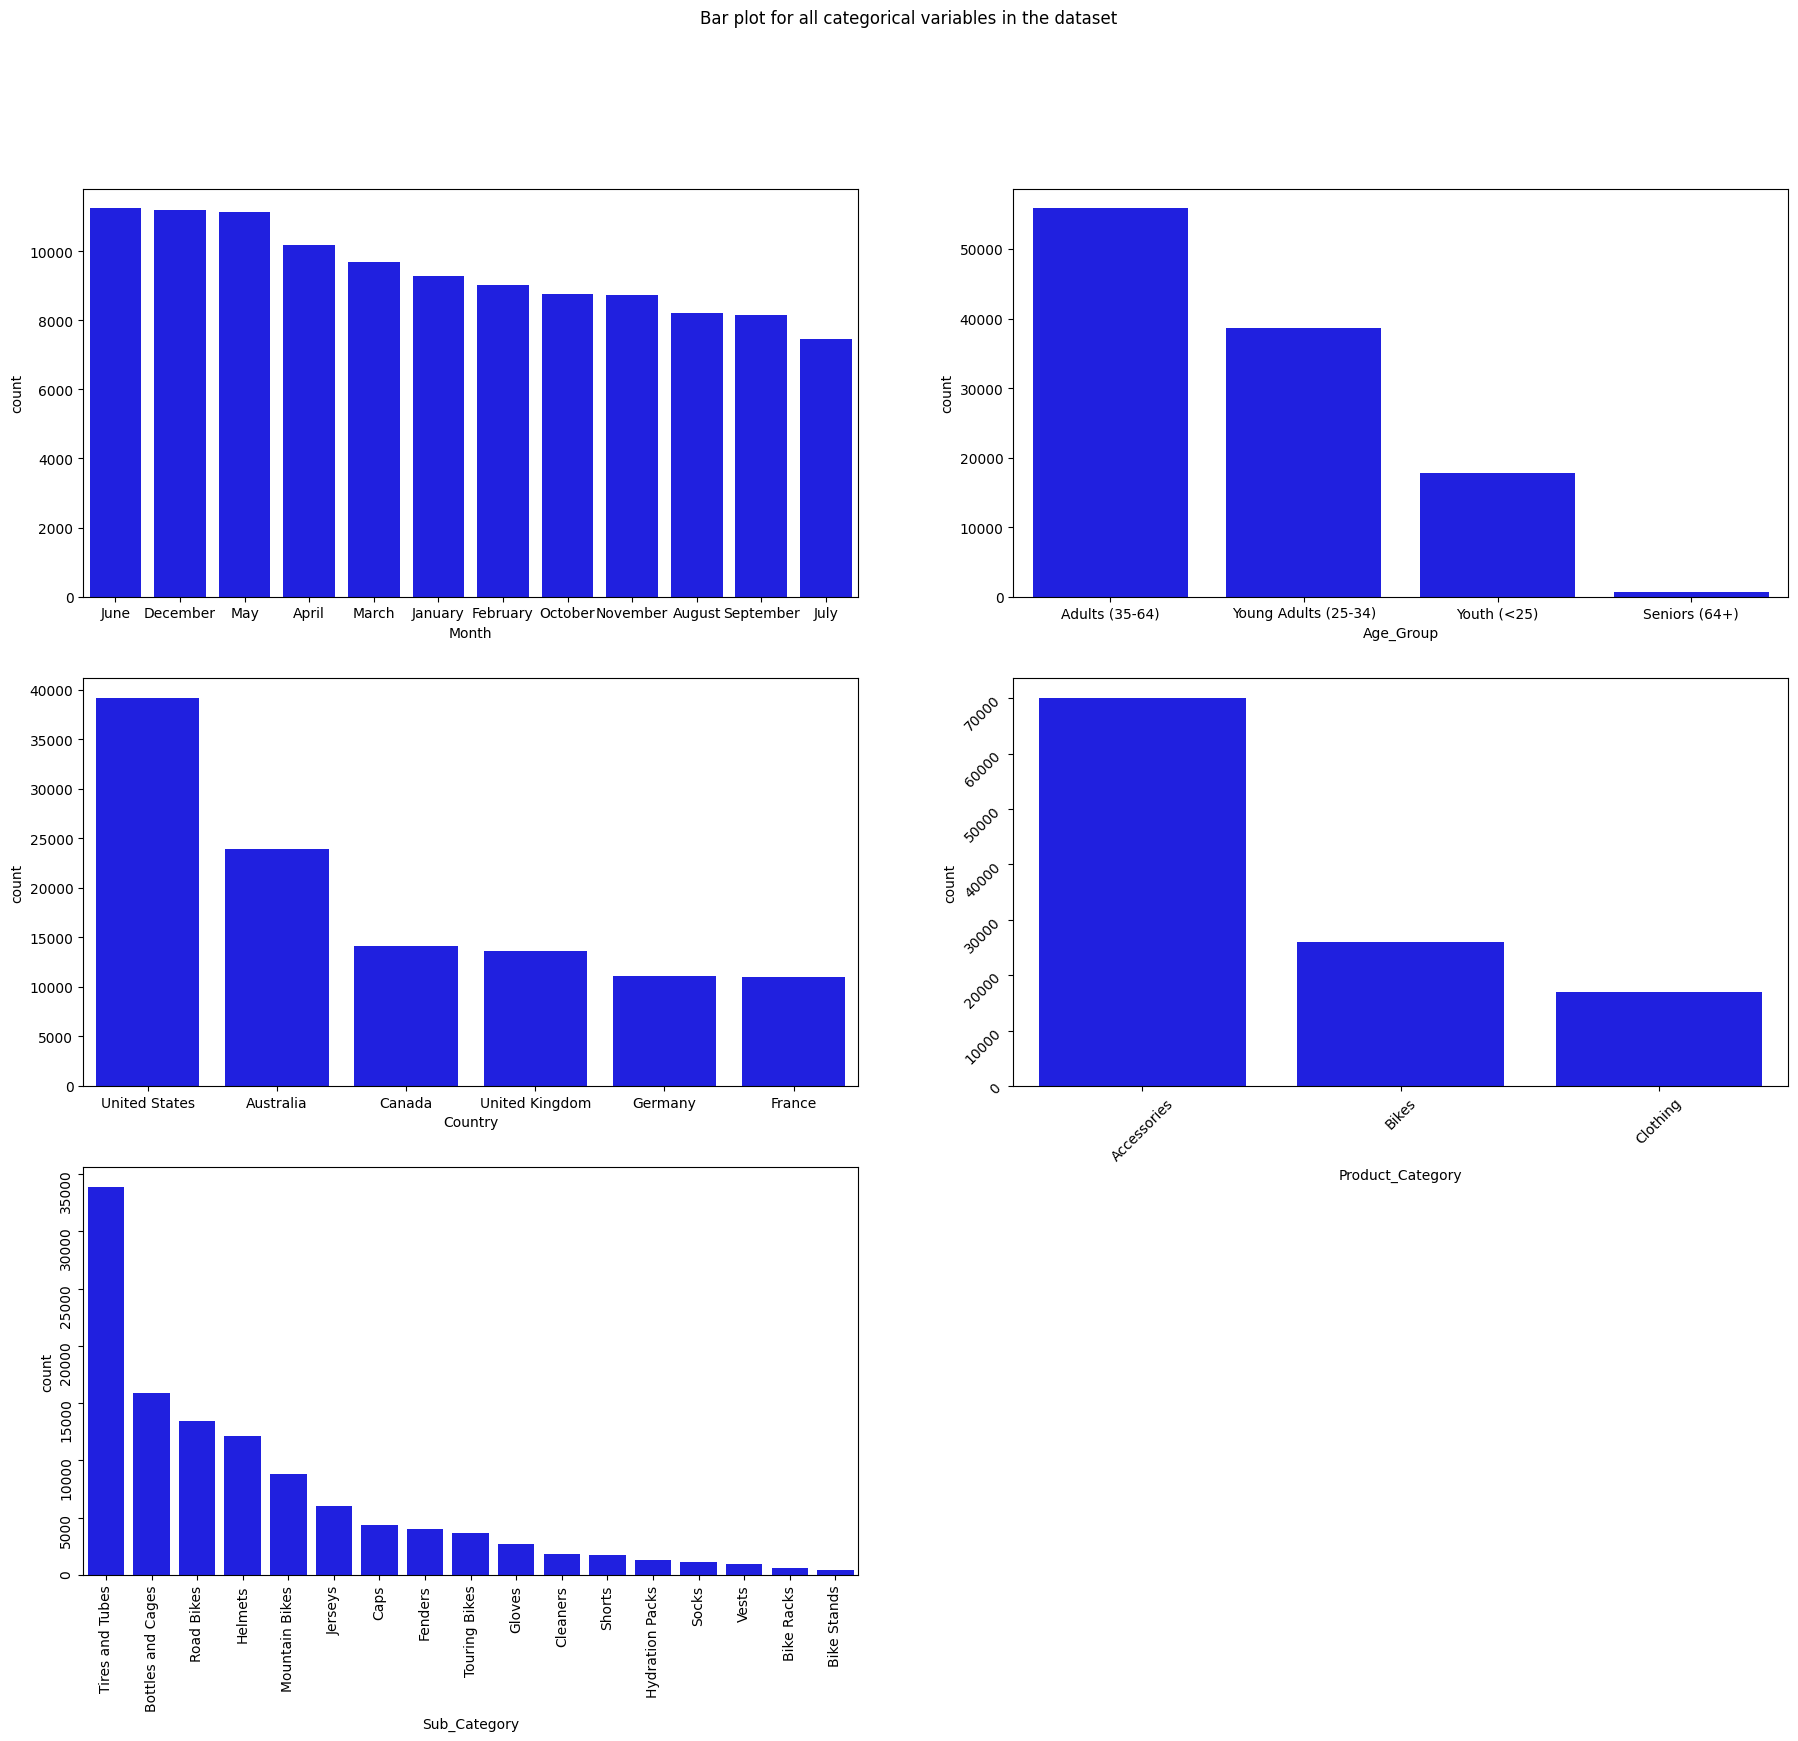

In [58]:
fig, axes = plt.subplots(3, 2, figsize=(22, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')

sns.countplot(ax=axes[0, 0], x='Month', data=df, color='blue', 
              order=df['Month'].value_counts().index)
sns.countplot(ax=axes[0, 1], x='Age_Group', data=df, color='blue', 
              order=df['Age_Group'].value_counts().index)
sns.countplot(ax=axes[1, 0], x='Country', data=df, color='blue', 
              order=df['Country'].value_counts().index)
sns.countplot(ax=axes[1, 1], x='Product_Category', data=df, color='blue', 
              order=df['Product_Category'].value_counts().index)
sns.countplot(ax=axes[2, 0], x='Sub_Category', data=df, color='blue', 
              order=df['Sub_Category'].value_counts().index)

fig.delaxes(axes[2, 1])

axes[1, 1].tick_params(labelrotation=45)
axes[2, 0].tick_params(labelrotation=90)

plt.show()


From the visualization above, several insights can be drawn:
- June is the month with the highest number of sales.
- Adults are the largest group of buyers compared to other age groups.
- The United States has the highest number of bike-related product sales among all countries.
- Customers tend to purchase accessories more than other product categories.
- "Tires and Tubes" is the most purchased item.

### EDA Bivariate Analysis

Bivariate analysis compares two variables to observe their relationship. The first step is to analyze the relationships between numerical attributes, as visualized in the pairplot above. This helps identify potential correlations, trends, or patterns between pairs of numerical variables in the dataset.

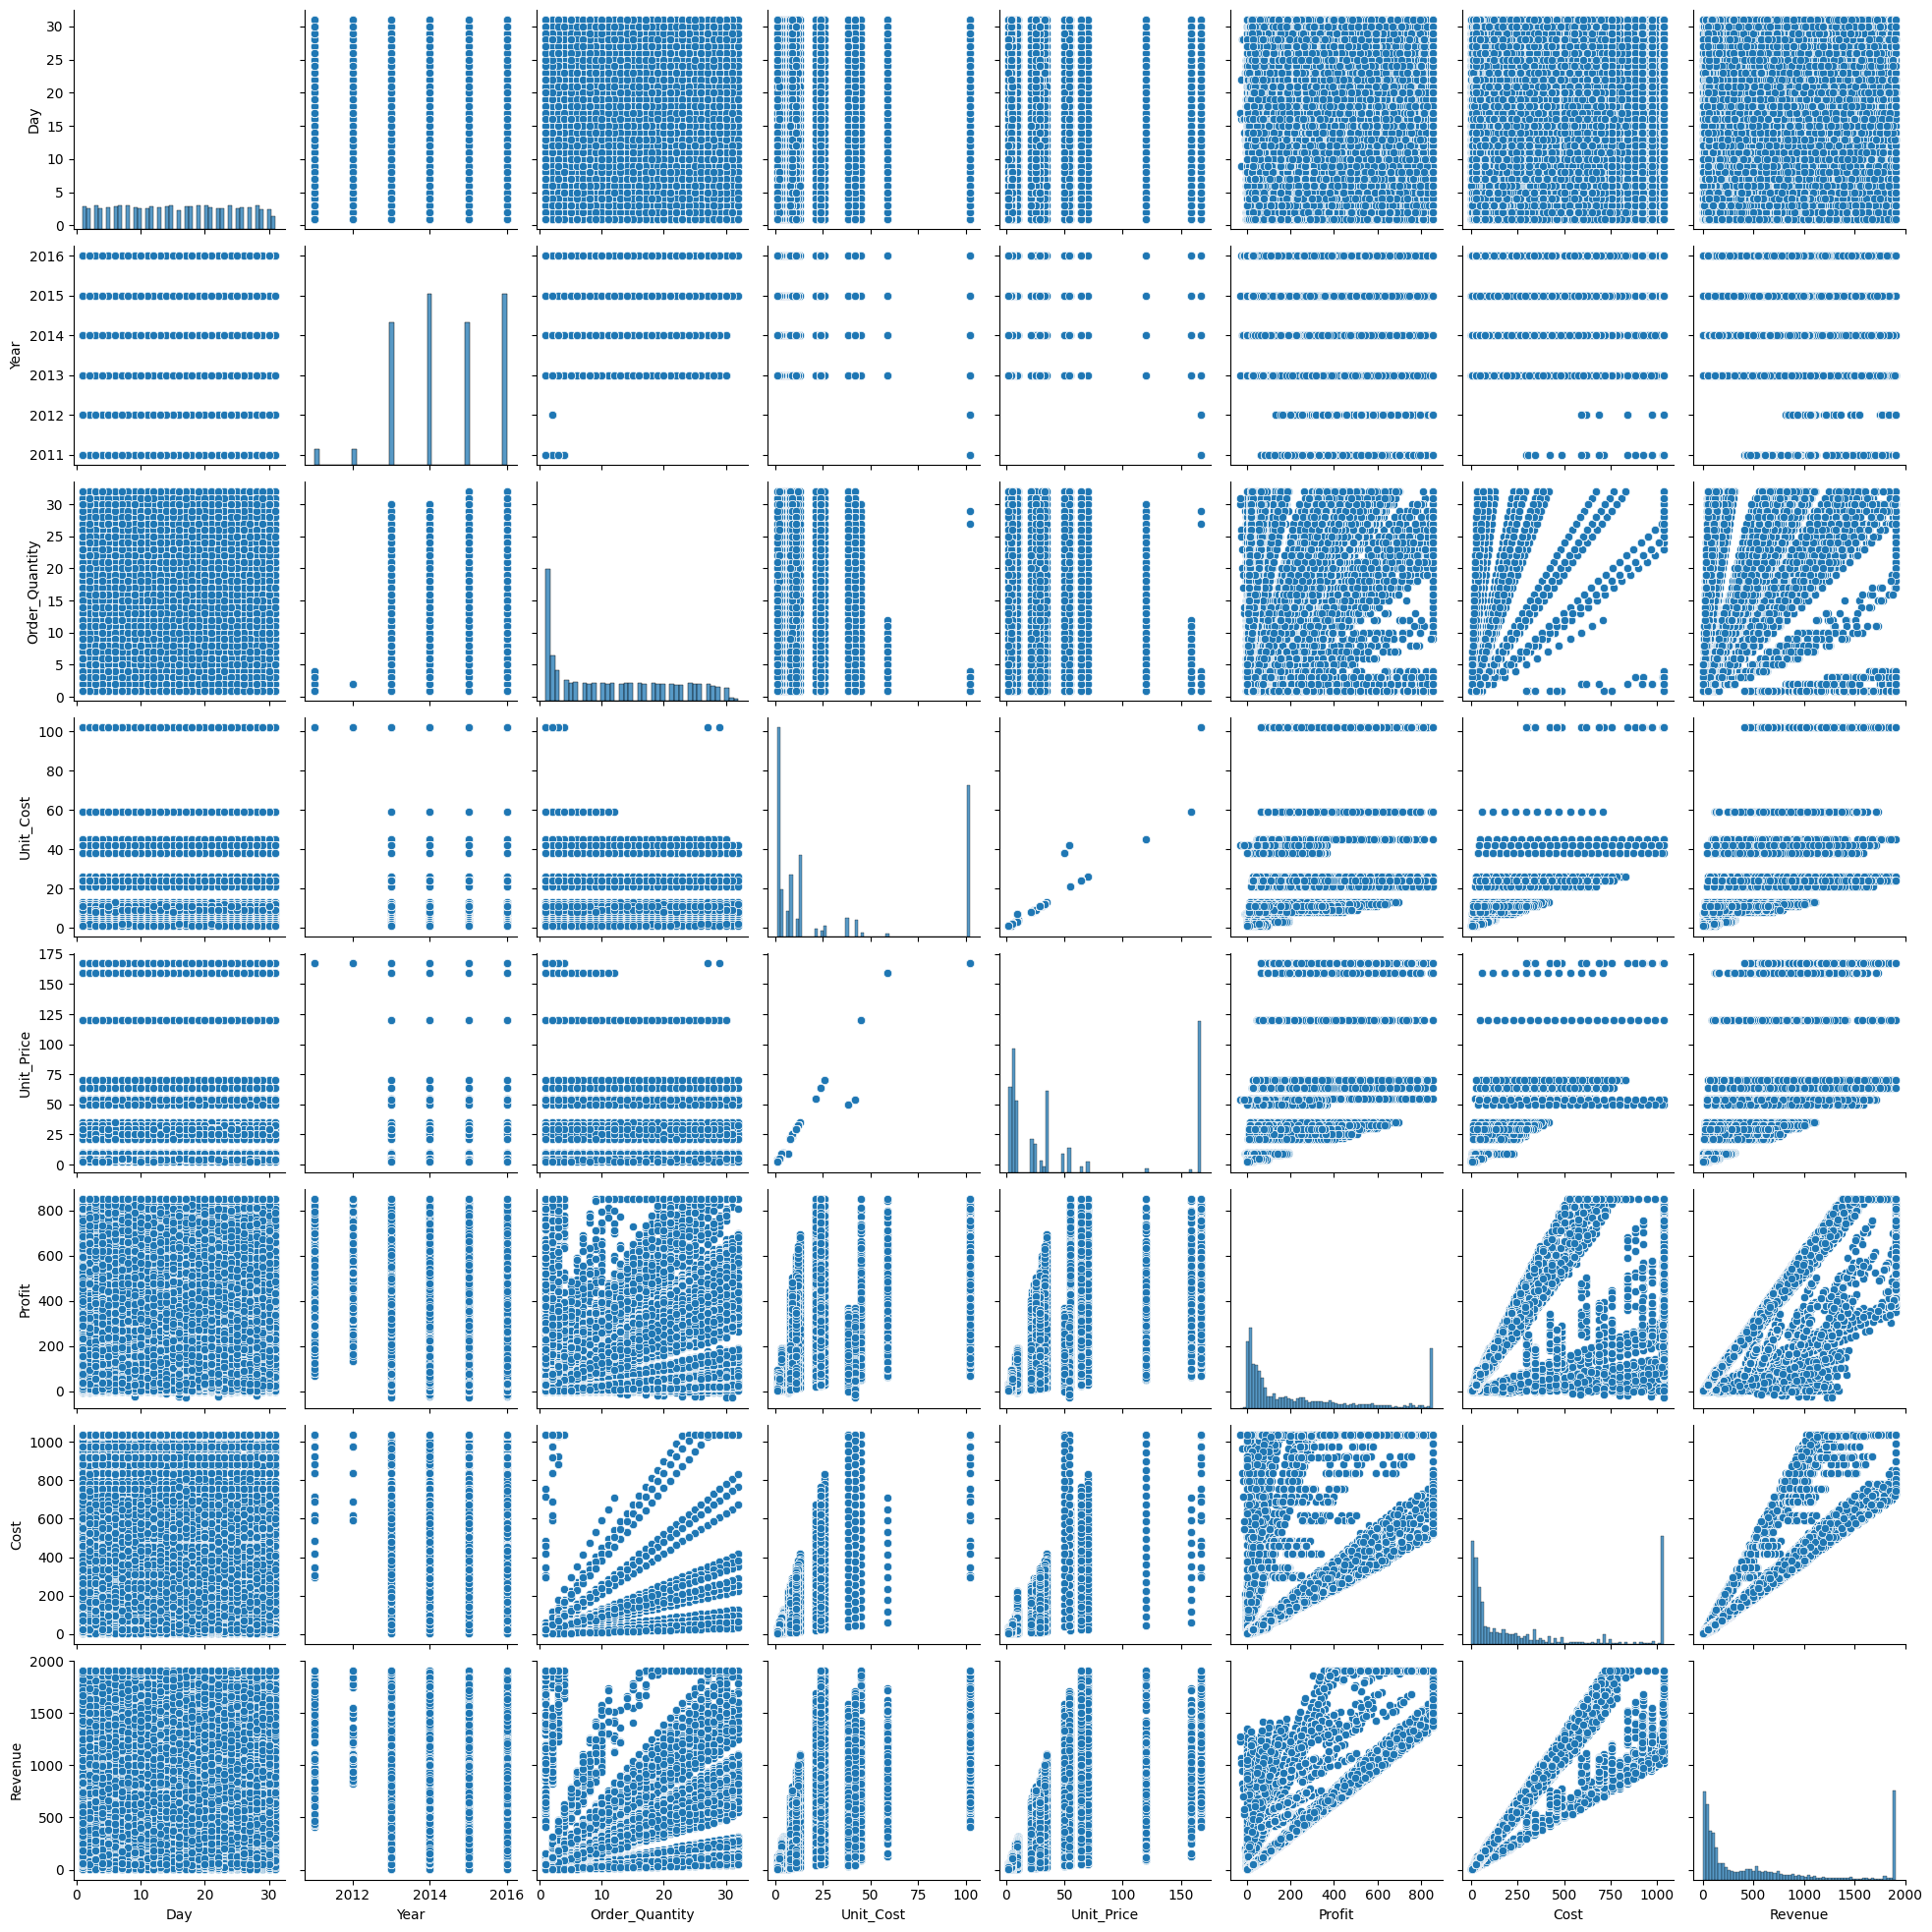

In [59]:
sns.pairplot(df)
plt.show()

From the visualization above, several insights can be analyzed:
- The higher the unit price, the higher the unit cost.
- The higher the revenue, the higher the cost.

Next is created to compare two categorical attributes, allowing us to observe the distribution and relationship between different categories in the dataset.

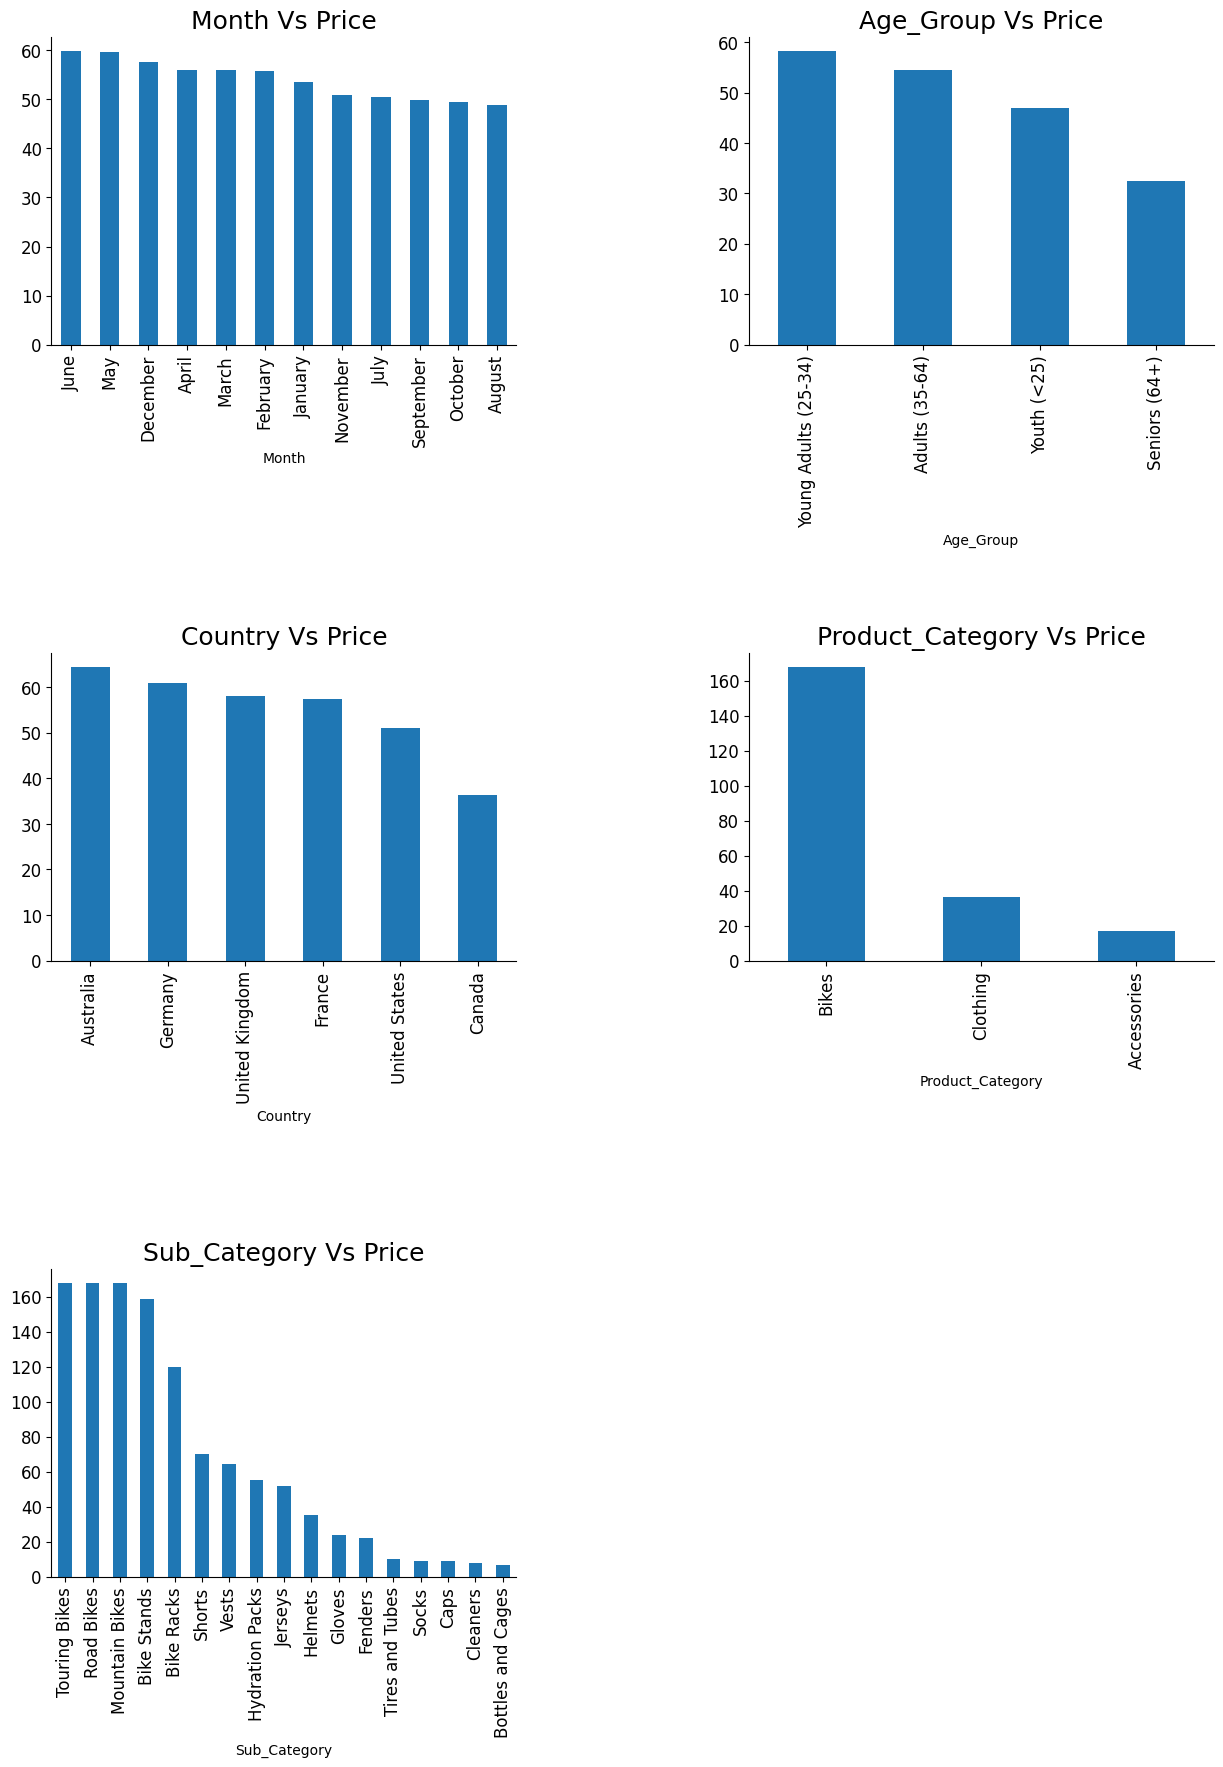

In [60]:
fig, axarr = plt.subplots(3, 2, figsize=(15, 20))
df.groupby('Month')['Unit_Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Month Vs Price", fontsize=18)
df.groupby('Age_Group')['Unit_Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Age_Group Vs Price", fontsize=18)
df.groupby('Country')['Unit_Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Country Vs Price", fontsize=18)
df.groupby('Product_Category')['Unit_Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Product_Category Vs Price", fontsize=18)
df.groupby('Sub_Category')['Unit_Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Sub_Category Vs Price", fontsize=18)

fig.delaxes(axarr[2][1])

plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=0.5)
sns.despine()

plt.show()

From the visualization above, the following insights can be analyzed:
- June is the month with the highest average selling price, while August has the lowest.
- Young adults tend to purchase more expensive items compared to other age groups, while seniors more often buy cheaper products.
- Australia has the highest average selling prices among the countries.
- The "Bikes" category is the most expensive, while "Accessories" is the least expensive category.
- "Touring bikes," "road bikes," and "mountain bikes" are the most expensive items, whereas "Tires and Tubes," "socks," "caps," "cleaners," and "bottles and cages" are among the cheapest products sold.

### EDA Multivariate Analysis

Multivariate analysis examines more than two variables to determine relationships and analyze patterns within the dataset. An example is the heatmap shown above, which displays the correlation between variables. The darker the color, the stronger the relationship between the two variables. Positive and negative signs indicate the direction of the relationship: a positive value means that as one variable increases, the other also increases, while a negative value means that as one variable increases, the other decreases.

In [61]:
df[num_cols].corr()

,Day,Year,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.002412,0.000696,0.001882,0.002140,0.000272,0.001167
Year,-0.007635,1.000000,0.123169,-0.235921,-0.232727,-0.185827,-0.218203,-0.212653
Order_Quantity,-0.002412,0.123169,1.000000,-0.592644,-0.589115,-0.231894,-0.364374,-0.327050
Unit_Cost,0.000696,-0.235921,-0.592644,1.000000,0.991048,0.725475,0.891010,0.853773
Unit_Price,0.001882,-0.232727,-0.589115,0.991048,1.000000,0.759835,0.880695,0.861799
Profit,0.002140,-0.185827,-0.231894,0.725475,0.759835,1.000000,0.851222,0.936709
Cost,0.000272,-0.218203,-0.364374,0.891010,0.880695,0.851222,1.000000,0.976142
Revenue,0.001167,-0.212653,-0.327050,0.853773,0.861799,0.936709,0.976142,1.000000


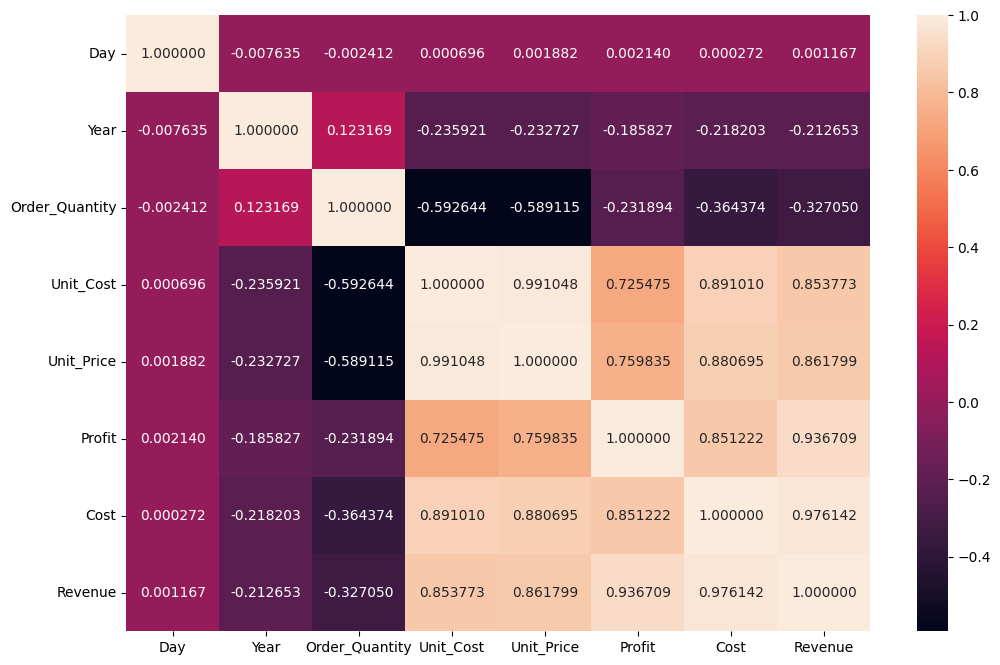

In [62]:
plt.subplots(figsize = (12,8))
sns.heatmap(df[num_cols].corr(),annot=True,fmt="f")
plt.show()

From the heatmap above, several conclusions can be drawn:

1. The **Unit Price** variable has a strong positive correlation with **Unit Cost** (0.99), **Profit** (0.74), **Cost** (0.82), and **Revenue** (0.81). This means that as the Unit Price increases, the values of Unit Cost, Profit, Cost, and Revenue also tend to increase significantly.

2. The **Order_Quantity** variable has a strong negative correlation with **Unit Cost** (-0.51) and a moderate negative correlation with **Unit Price** (-0.51). This indicates that as Order Quantity increases, both Unit Cost and Unit Price tend to decrease.

3. The **Year** variable shows a moderately strong negative correlation with **Unit Cost**, **Unit Price**, **Profit**, **Cost**, and **Revenue**. As the Year increases, these variables tend to decrease noticeably.

4. The **Profit** variable has a strong positive correlation with **Unit Cost**, **Unit Price**, **Cost**, and **Revenue**. This means that as Profit increases, Unit Cost, Unit Price, Cost, and Revenue also tend to increase significantly.

## Conclusion

The exploratory data analysis of the bike sales dataset reveals several key insights:

- **Sales Trends**: June is the peak month for sales, and adults (35-64) are the primary buyers. The United States leads in sales volume, and accessories are the most frequently purchased product category, with "Tires and Tubes" being the top-selling sub-category.
- **Product Pricing**: The "Bikes" category, especially "Touring bikes," "road bikes," and "mountain bikes," commands the highest average prices, while accessories and related items are generally less expensive.
- **Customer Segmentation**: Young adults tend to purchase higher-priced items, while seniors prefer more affordable products.
- **Correlations**: Strong positive correlations exist between unit price, unit cost, profit, cost, and revenue. Order quantity is negatively correlated with unit price and unit cost, indicating bulk purchases are associated with lower prices and costs.
- **Business Implications**: Focusing marketing efforts on adults and young adults, especially in the United States and Australia, and promoting high-margin products like bikes can drive revenue growth.

Overall, the analysis provides actionable insights for inventory management, pricing strategies, and targeted marketing to maximize sales and profitability.